In [1]:
import torch.utils.data as data
import cv2
import numpy as np
import matplotlib.pyplot as plt
from data_loader import get_loader
from matchmap_visualize import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [28]:
# Load Model
max_image_model = 'models/npairs_loss_model.tar'
max_text_model = 'models/60epochs_max_text_npairs.tar'
avg_both_model = 'models/50epochs_avg_both_npairs.tar'

maximg_image_model, maximg_caption_model = load_model(model_path = max_image_model)
maxtext_image_model, maxtext_caption_model = load_model(model_path = max_text_model)
avg_both_image_model, avg_both_caption_model = load_model(model_path = avg_both_model)

Loaded checkpoint 'models/npairs_loss_model.tar' (epoch 34)
Loaded checkpoint 'models/60epochs_max_text_npairs.tar' (epoch 60)
Loaded checkpoint 'models/50epochs_avg_both_npairs.tar' (epoch 50)


In [31]:
maximg_image_model.eval()
maximg_caption_model.eval()
maxtext_image_model.eval()
maxtext_caption_model.eval()
avg_both_image_model.eval()
avg_both_caption_model.eval()


LSTMBranch(
  (lstm): LSTM(300, 1024)
)

## MSCOCO Dataset Matchmaps

In [32]:
# Load a batch of triplet of data

batch_size = 20
image_tensor, caption_glove_tensor, caption_list = get_data(batch_size, dataset = 'mscoco')

print("Generating Max Text Matchmaps")
MSCOCO_matchmaps_max_text = gen_matchmap(maxtext_image_model, maxtext_caption_model, image_tensor, caption_glove_tensor)
print("Generating Sum Both Text Matchmaps")
MSCOCO_matchmaps_avg_both = gen_matchmap(avg_both_image_model, avg_both_caption_model, image_tensor, caption_glove_tensor)
print("Generating Max Image Matchmaps")
MSCOCO_matchmaps_max_image = gen_matchmap(maximg_image_model, maximg_caption_model, image_tensor, caption_glove_tensor)

Vocabulary successfully loaded from vocab.pkl file!
loading annotations into memory...
Done (t=0.90s)
creating index...
index created!
Obtaining caption lengths...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 202654/202654 [00:43<00:00, 4634.22it/s]


Generating Max Text Matchmaps
Generating Sum Both Text Matchmaps
Generating Max Image Matchmaps


In [37]:
MSCOCO_diff = MSCOCO_matchmaps_avg_both[0] - MSCOCO_matchmaps_max_text[0]
MSCOCO_diff.shape

(22, 14, 14)

## Flickr30K Entities Matchmaps

In [38]:
batch_size = 20
image_tensor_flickr, caption_glove_tensor_flickr, caption_list_flickr = get_data(batch_size, dataset='flickr30k')

print("Generating Max Text Matchmaps")
flickr_matchmaps_max_text = gen_matchmap(maxtext_image_model, maxtext_caption_model, image_tensor_flickr, caption_glove_tensor_flickr)
print("Generating Sum Both Text Matchmaps")
f_matchmaps_avg_both = gen_matchmap(avg_both_image_model, avg_both_caption_model, image_tensor_flickr, caption_glove_tensor_flickr)
print("Generating Max Image Matchmaps")
flickr_matchmaps_max_image = gen_matchmap(maximg_image_model, maximg_caption_model, image_tensor_flickr, caption_glove_tensor_flickr)

Generating Max Text Matchmaps
Generating Sum Both Text Matchmaps
Generating Max Image Matchmaps


## Max Image Visualization

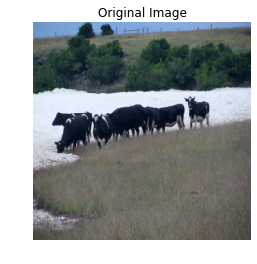

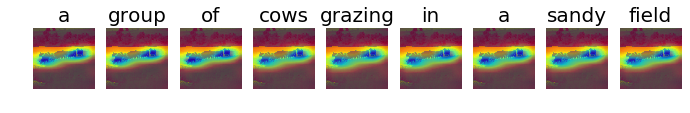

In [64]:
index = 1
name = str(index)


color_img, bw_img, mask_list, caption = gen_masks(MSCOCO_matchmaps_max_image, image_tensor, 
                                                 caption_list, index)
gen_results(color_img, bw_img, mask_list, caption, name = name, save_flag=False)

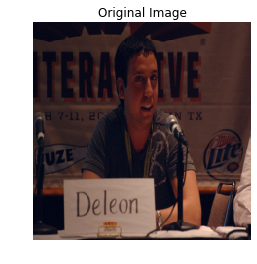

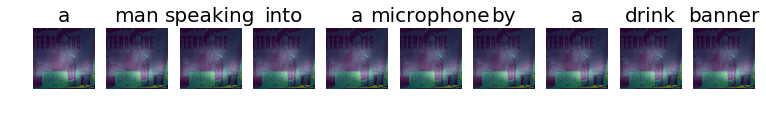

In [57]:
index = 4
name = str(index)

color_img, bw_img, mask_list, caption = gen_masks(flickr_matchmaps_max_image, image_tensor_flickr, 
                                                 caption_list_flickr, index)
gen_results(color_img, bw_img, mask_list, caption, name = name, save_flag=False)

## Max Text Visualization

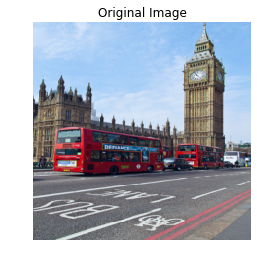

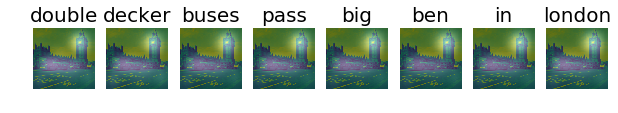

In [58]:
index = 12
name = str(index)

color_img, bw_img, mask_list, caption = gen_masks(MSCOCO_matchmaps_max_text, image_tensor, 
                                                 caption_list, index)
gen_results(color_img, bw_img, mask_list, caption, name = name, save_flag=False)

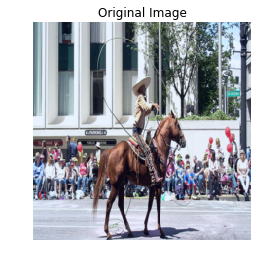

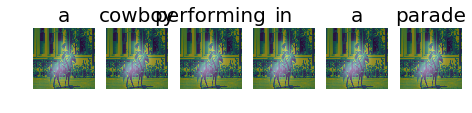

In [59]:
index = 10
name = str(index)

color_img, bw_img, mask_list, caption = gen_masks(flickr_matchmaps_max_text, image_tensor_flickr, 
                                                 caption_list_flickr, index)
gen_results(color_img, bw_img, mask_list, caption, name = name, save_flag=False)

## Avg Both Visualization

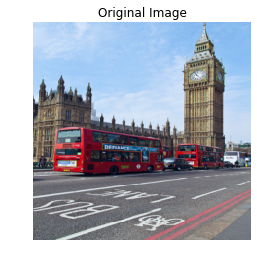

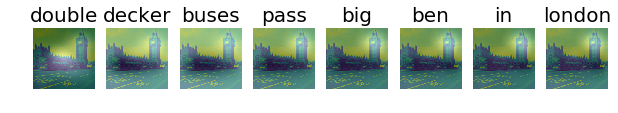

In [60]:
index = 12
name = str(index)


color_img, bw_img, mask_list, caption = gen_masks(MSCOCO_matchmaps_avg_both, image_tensor, 
                                                 caption_list, index)
gen_results(color_img, bw_img, mask_list, caption, name = name, save_flag=False)

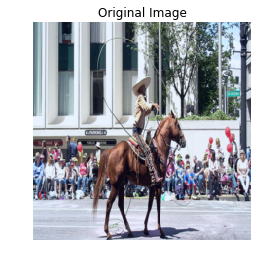

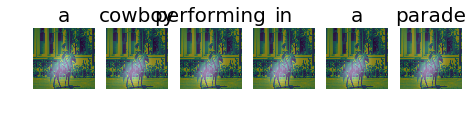

In [61]:
index = 10
name = str(index)

color_img, bw_img, mask_list, caption = gen_masks(f_matchmaps_avg_both, image_tensor_flickr, 
                                                 caption_list_flickr, index)
gen_results(color_img, bw_img, mask_list, caption, name = name, save_flag=False)